## Chain Of Thought Prompt


Chain of Thought(CoT) 프롬프트는 중간 추론 단계를 통해 복잡한 추론을 가능하게 합니다.

이를 단답형 프롬프트와 결합하면 응답하기 전에 추론이 필요한 복잡한 작업에서 더 나은 결과를 얻을 수 있습니다.

하지만 CoT 프롬프트를 작성하는 것은 쉽지 않습니다. 마치 즉흥적인 사람에게 계획적으로 살라는 말과 같은 느낌입니다.

그래서 CoT를 하면 얻어갈 수 있는 이점을 이 사례로 설명을 하게 되면 필요성과 어떤 결과를 얻을 수 있을지 예상이 될 것이라 생각합니다.


### 예시 (장보기)

한 남성은 아내로부터 아주 빨리 장을 보고 오라는 지령을 받았다고 가정을 하겠습니다.

> 아내 : 여보, 마트에 가서 식빵 하나, 계란 한판, 대파 하나랑 양파 좀 사와줘.
>
> 남편 : 응 알았어.
>
> 아내 : 아 맞다. 지현이가 콘칩도 하나 사달래. 그리구 어머니 곧 오신다니까 어머니 오시기 전에 얼른 사서 와.
>
> (장을 볼 수 있는 시간, 3분)

목적 : 최대한 짧은 경로(적은 비용)로 장보기

조건
- 반드시 A 구역에서 시작해서 D 구역으로 끝나야 합니다.
- 반드시 모든 경로를 1번 이상 거쳐야 합니다.

### 물건별 위치 테이블

| 물건 | 위치 | 
| ---- | ---- |
| 식빵 | D    |
| 계란 | B    |
| 대파 | A1   |
| 양파 | A2   |
| 콘칩 | C    |

### 이동 시간 테이블

| 출발지 | 도착지 | 이동 시간(초) |
|:----:|:----:|:----------:|
| A1   | A2   | 20         |
| A1   | B    | 30         |
| A1   | C    | 70         |
| A1   | D    | 120        |
| A2   | A1   | 20         |
| A2   | B    | 30         |
| A2   | C    | 70         |
| A2   | D    | 120        |
| B    | A1   | 80         |
| B    | A2   | 80         |
| B    | C    | 30         |
| B    | D    | 90         |
| C    | A1   | 100        |
| C    | A2   | 100        |
| C    | B    | 80         |
| C    | D    | 30         |
| D    | A1   | 120        |
| D    | A2   | 120        |
| D    | B    | 90         |
| D    | C    | 80         |

---

이런 문제가 주어졌을 때, 정답을 찾기 위해 메모지에 어떤 순서로 살지 경로를 설계를 하는 사람이 있는 반면

'그냥 보이는대로 주섬주섬 사면 되지' 라는 생각을 가지고 지령을 수행을 한 사람이 있기도 합니다.

결과적으로 물건을 정상적으로 살 수 있겠지만 목적을 달성해낼 수 있을지는 조금 부족할 수 있습니다.

이런 경우, "어떤 순서로 살지 경로 설계"를 하는 사람이 바로 CoT 프롬프트를 작성한 사람이라고 볼 수 있습니다.

---

정리하자면 CoT 프롬프트는 어떠한 요청에 대해서 어떤 식으로 문제를 해결해나갈지 추론 과정을 쪼개어 프롬프트를 작성해나가는 것을 말합니다.

이렇게 하게 되면, 일반적으로 zero-shot 프롬프트로 해결할 수 없는 문제들을 풀어낼 수 있어 집니다.
그렇다고 무조건 CoT가 항상 좋은 결과를 낸다고는 보장할 수 없습니다.

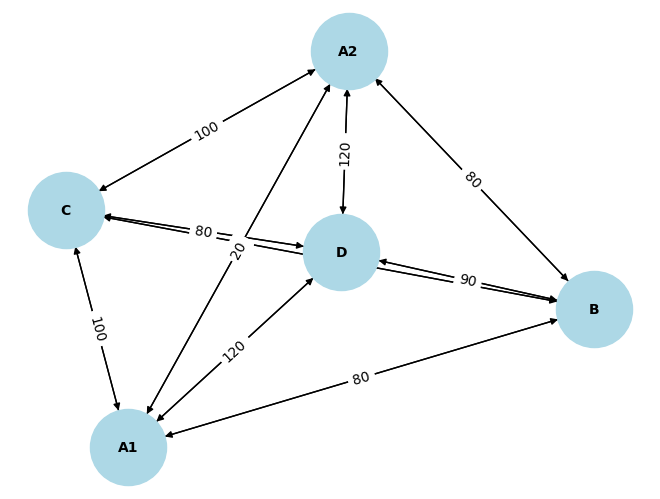

None

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display

# 그래프 생성
G = nx.DiGraph()

# 노드 추가
G.add_node('A1', label='A1 (대파)')
G.add_node('A2', label='A2 (양파)')
G.add_node('B', label='B (계란)')
G.add_node('C', label='C (콘칩)')
G.add_node('D', label='D (식빵)')

# 엣지 추가
G.add_edge('A1', 'A2', weight=20)
G.add_edge('A1', 'B', weight=30)
G.add_edge('A1', 'C', weight=70)
G.add_edge('A1', 'D', weight=120)
G.add_edge('A2', 'A1', weight=20)
G.add_edge('A2', 'B', weight=30)
G.add_edge('A2', 'C', weight=70)
G.add_edge('A2', 'D', weight=120)
G.add_edge('B', 'A1', weight=80)
G.add_edge('B', 'A2', weight=80)
G.add_edge('B', 'C', weight=30)
G.add_edge('B', 'D', weight=90)
G.add_edge('C', 'A1', weight=100)
G.add_edge('C', 'A2', weight=100)
G.add_edge('C', 'B', weight=80)
G.add_edge('C', 'D', weight=30)
G.add_edge('D', 'A1', weight=120)
G.add_edge('D', 'A2', weight=120)
G.add_edge('D', 'B', weight=90)
G.add_edge('D', 'C', weight=80)

# 시각화
def plot_graph():
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

display(plot_graph())

### Few-shot Prompt vs CoT Prompt

두가지의 프롬프트 기법을 사용해 동일한 문제를 푸는 방법을 비교해보겠습니다.

In [3]:
# API KEY 값이 들어 있는 환경 변수 로드
# 새로운 실습 파일이 만들어 질 때마다 맨 상위에 항상 해당 코드를 넣어주세요.
from dotenv import load_dotenv

load_dotenv()

True

In [4]:
from langchain_openai import ChatOpenAI

# LLM 모델 정의
llm = ChatOpenAI(
    temperature=0.1,
    model_name="gpt-4o-mini",  # 모델명
)

# 질문
few_shot_prompt = """집합 {4, 8, 9, 15, 12, 2, 1}에서 홀수를 모두 더하면 짝수야.
답변: 홀수(9, 15, 1)를 모두 더하면 25가 돼. 위의 명제는 거짓이야.

집합 {17, 10, 19, 4, 8, 12, 24}에서 홀수를 모두 더하면 짝수야.
답변: 홀수(17, 19)를 모두 더하면 36이 돼. 위의 명제는 참이야.

집합 {16, 11, 14, 4, 8, 13, 24}에서 홀수를 모두 더하면 짝수야.
답변: 홀수(11, 13)를 모두 더하면 24가 돼. 위의 명제는 참이야.

집합 {17, 9, 10, 12, 13, 4, 2}에서 홀수를 모두 더하면 짝수야.
답변: 홀수(17, 9, 13)를 모두 더하면 39가 돼. 위의 명제는 거짓이야.

집합 {15, 32, 5, 13, 82, 7, 1}에서 홀수를 모두 더하면 짝수야.
답변:"""

# 대답 요청
print(f"[답변]: {llm.invoke(few_shot_prompt)}")

[답변]: content='홀수(15, 5, 13, 7, 1)를 모두 더하면 41이 돼. 위의 명제는 거짓이야.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 304, 'total_tokens': 341, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None} id='run-71a98aff-1cf9-4848-94c9-cdd9e3146f4b-0' usage_metadata={'input_tokens': 304, 'output_tokens': 37, 'total_tokens': 341, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [5]:
from langchain_openai import ChatOpenAI

# LLM 모델 정의
llm = ChatOpenAI(
    temperature=0.1,
    model_name="gpt-4o-mini",  # 모델명
)

# 질문
few_shot_prompt = """이 그룹의 홀수의 합은 짝수야: 4, 8, 9, 15, 12, 2, 1
A: 홀수(9, 15, 1)를 모두 더하면 25가 돼. 정답은 거짓이야.
이 그룹의 홀수의 합은 짝수야: 15, 32, 5, 13, 82, 7, 1
A:"""

# 대답 요청
print(f"[답변]: {llm.invoke(few_shot_prompt)}")

[답변]: content='홀수(15, 5, 13, 7, 1)를 모두 더하면 41이 됩니다. 41은 홀수이므로, 이 그룹의 홀수의 합은 짝수가 아닙니다. 따라서 정답은 거짓입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 107, 'total_tokens': 164, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None} id='run-b29d4f7e-0988-45ad-a229-a76c1887e2b7-0' usage_metadata={'input_tokens': 107, 'output_tokens': 57, 'total_tokens': 164, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


동일한 문제를 풀어내는데 있어서 정답은 모두 맞췄지만, few-shot 프롬프트는 304 토큰을 소비했고, CoT 프롬프트는 57 토큰을 소비했습니다.

CoT 프롬프트가 비용적으로 약 5배 더 저렴하게 동일한 결과를 수행했다고 볼 수 있습니다.

이러한 토큰 소비량은 실제 제품을 만들 때는 유지비용 측면을 고려해야하는 엔지니어 입장에서는 반드시 최적화를 해야하는 부분 중 하나 입니다.

따라서 다양한 프롬프트 엔지니어링 기법을 배우고, 상황에 맞는 기법을 적용해 토큰 최적화를 수행할 수 있어야 합니다.